# Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 150)
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
DATA_PATH_PREP = '../DATA/prepared'

# Load data

In [3]:
# data_table_soft = pd.read_pickle(f'{DATA_PATH_PREP}/04_data_table_soft.pkl')
# data_table_med = pd.read_pickle(f'{DATA_PATH_PREP}/04_data_table_med.pkl')
data_table_hard = pd.read_pickle(f'{DATA_PATH_PREP}/04_data_table_hard.pkl')

# Split data

In [4]:
X = data_table_hard.drop('author', axis=1)
y = data_table_hard['author']

# Choose a model

In [5]:
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True)

lr = LogisticRegression()
print(f'LogisticRegression: {cross_val_score(lr, X, y, cv=strat_k_fold).mean()}')

knn = KNeighborsClassifier(n_neighbors=5)
print(f'KNeighborsClassifier: {cross_val_score(knn, X, y, cv=strat_k_fold).mean()}')

gnb = GaussianNB()
print(f'GaussianNB: {cross_val_score(gnb, X, y, cv=strat_k_fold).mean()}')

mnb = MultinomialNB()
print(f'MultinomialNB: {cross_val_score(mnb, X, y, cv=strat_k_fold).mean()}')

LogisticRegression: 1.0
KNeighborsClassifier: 1.0
GaussianNB: 1.0
MultinomialNB: 1.0


## `LogisticRegression`

In [8]:
log_reg = LogisticRegression(multi_class='auto')

# Perform cross-validation
scores_log_reg = cross_validate(log_reg, X, y, cv=5, scoring=('neg_log_loss', 'f1_macro', 'accuracy'), return_train_score=True)

# Print the mean and standard deviation of the scores_log_reg
print(f"F1 Score: {scores_log_reg['test_f1_macro'].mean():.2f} (+/- {scores_log_reg['test_f1_macro'].std() * 2:.2f})")
print(f"Neg Log Loss: {scores_log_reg['test_neg_log_loss'].mean():.2f} (+/- {scores_log_reg['test_neg_log_loss'].std() * 2:.2f})")

scores_log_reg

F1 Score: 1.00 (+/- 0.00)
Neg Log Loss: -0.12 (+/- 0.02)


{'fit_time': array([46.60050178, 50.45569158, 48.17863178, 50.15326047, 45.16486573]),
 'score_time': array([6.27061605, 7.33857942, 6.58240962, 6.31829286, 6.4513073 ]),
 'test_neg_log_loss': array([-0.11125182, -0.12158587, -0.13698518, -0.12316344, -0.10106389]),
 'train_neg_log_loss': array([-0.10231682, -0.10237432, -0.09930565, -0.101202  , -0.10385287]),
 'test_f1_macro': array([1., 1., 1., 1., 1.]),
 'train_f1_macro': array([1., 1., 1., 1., 1.]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'train_accuracy': array([1., 1., 1., 1., 1.])}

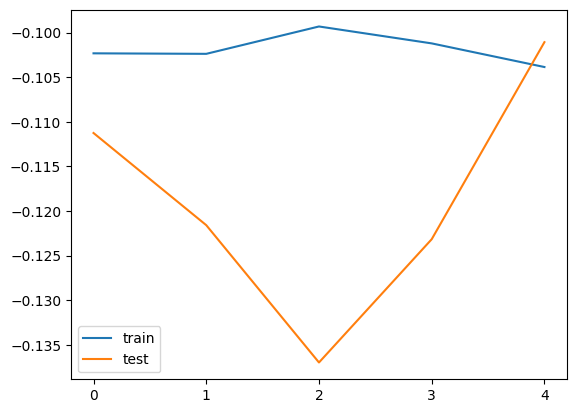

In [9]:
plt.plot(scores_log_reg['train_neg_log_loss'], label='train')
plt.plot(scores_log_reg['test_neg_log_loss'], label='test')

plt.xticks(range(len(scores_log_reg['test_neg_log_loss'])))

plt.legend()

plt.show()

# Going with `LogisticRegression`

It's simple and it works.

In [11]:
log_reg.fit(X, y)
pickle.dump(log_reg, open(f'{DATA_PATH_PREP}/06_model_log_reg.pkl', 'wb'))